In [51]:
import gradio as gr
import torch
from src.train import train
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
import pandas as pd

In [ ]:
def load_data(dataset):
    match dataset:
        case "Iris":
            X, y = load_iris(return_X_y=True)
        case "Wine Quality":
            X, y = load_wine(return_X_y=True)
        case "Breast Cancer":
            X, y = load_breast_cancer(return_X_y=True)
        case _:
            dataset = pd.read_csv(dataset)
            target_name = dataset.columns[-1]
            if target_name not in dataset.columns:
                raise KeyError(f"Target column '{target_name}' not found in DataFrame columns: {list(dataset.columns)}")

            y = dataset[target_name].copy()
            X = dataset.drop(columns=[target_name]).copy()
    return X, y

In [53]:
X, y = load_breast_cancer(return_X_y=True)
breast = load_breast_cancer()
feature_names = breast.feature_names
model,data = train(X=X, y=y,save=True,model_state=None)

Target labels: [0 1]


lr: 0.001
Epoch 01 | Loss: 0.7223 | Acc: 0.2082 | Val Loss: 0.7182 | Val Acc: 0.2456
Epoch 02 | Loss: 0.7186 | Acc: 0.2170 | Val Loss: 0.7146 | Val Acc: 0.2719
Epoch 03 | Loss: 0.7149 | Acc: 0.2434 | Val Loss: 0.7110 | Val Acc: 0.2895
Epoch 04 | Loss: 0.7113 | Acc: 0.2639 | Val Loss: 0.7075 | Val Acc: 0.3158
Epoch 05 | Loss: 0.7076 | Acc: 0.2933 | Val Loss: 0.7039 | Val Acc: 0.3246
Epoch 06 | Loss: 0.7039 | Acc: 0.3226 | Val Loss: 0.7003 | Val Acc: 0.3421
Epoch 07 | Loss: 0.7003 | Acc: 0.3607 | Val Loss: 0.6967 | Val Acc: 0.4561
Epoch 08 | Loss: 0.6966 | Acc: 0.4106 | Val Loss: 0.6931 | Val Acc: 0.5088
Epoch 09 | Loss: 0.6928 | Acc: 0.4692 | Val Loss: 0.6893 | Val Acc: 0.5439
Epoch 10 | Loss: 0.6889 | Acc: 0.5220 | Val Loss: 0.6856 | Val Acc: 0.6140
Epoch 11 | Loss: 0.6850 | Acc: 0.5748 | Val Loss: 0.6818 | Val Acc: 0.6404
Epoch 12 | Loss: 0.6810 | Acc: 0.6833 | Val Loss: 0.6779 | Val Acc: 0.7105
Epoch 13 | Loss: 0.6769 | Acc: 0.7331 | Val Loss: 0.6739 | Val Acc: 0.8246
Epoch 14 | Loss

Train Accuracy,▁▁▁▂▂▂▃▃▄▄▆▆▇▇▇█████████████████████████
Train Loss,█████▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁
Val Accuracy,▁▁▁▂▂▃▄▄▅▅▇▇████████████████████████████
Val Loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁
Train Accuracy,0.94721
Train Loss,0.46278
Val Accuracy,0.89474
Val Loss,0.46715


In [54]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [55]:
model.eval()
with torch.no_grad():
    y_pred_probs = model(data["X_test_tensor"])
    y_pred = (y_pred_probs > 0.5).int()

In [56]:
y_pred_np = y_pred.numpy().flatten()
y_true_np = data["y_test_tensor"].numpy().flatten()

print(classification_report(y_true_np, y_pred_np, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       0.95      0.88      0.91        42
      benign       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



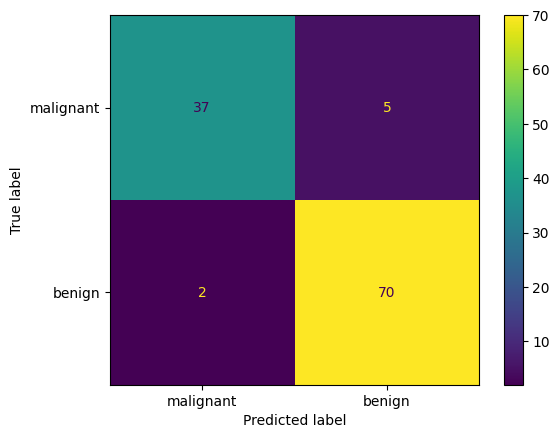

In [57]:
cm = confusion_matrix(y_true_np, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["malignant", "benign"])
disp.plot()

# DEXIRE

In [58]:
from explainer.dexire import get_dexire_rules

In [59]:
rules = get_dexire_rules(model,data,feature_names=feature_names)

y_train unique values: [0 1]
class_names: ['malignant', 'benign']
12
feature_12
Symbolic expression: feature_12 <= 0.5
Symbolic expression: feature_12 > 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
2
feature_2
Symbolic expression: feature_2 <= 0.5
13
feature_13
Symbolic expression: feature_13 <= 0.5
Symbolic expression: feature_13 > 0.5
Symbolic expression: feature_2 > 0.5
Symbolic expression: feature_14 > 0.5
27
X_27
Symbolic expression: X_27 <= 0.47
22
X_22
Symbolic expression: X_22 <= 0.622
6
X_6
Symbolic expression: X_6 <= 0.534
7
X_7
Symbolic expression: X_7 <= 0.557
27
X_27
Symbolic expression: X_27 <= 0.227
Symbolic expression: X_27 > 0.227
Symbolic expression: X_7 > 0.557
Symbolic expression: X_6 > 0.534
Symbolic expression: X_22 > 0.622
Symbolic expression: X_27 > 0.47
20
X_20
Symbolic expression: X_20 <= -0.183
Symbolic expression: X_20 > -0.183
6
X_6
Symbolic expression: X_6 <= -0.013
Symbolic expression: X_6 > -0.013
3
feature_3
Symbolic expression: feature_3 <=

In [60]:
rules

[IF ((X_7 > 0.27) AND (X_27 > -0.06) AND (X_19 <= 3.448) AND (X_13 <= -0.581)) THEN malignant, IF ((X_7 <= 0.27) AND (X_25 <= 0.992) AND (X_28 <= 3.039) AND (X_22 <= 0.662)) THEN malignant, IF ((X_27 > 0.47) AND (X_20 <= -0.183)) THEN malignant, IF ((X_27 > 0.036) AND (X_26 > -0.26) AND (X_21 > -1.523) AND (X_6 <= -0.465)) THEN malignant, IF ((X_7 <= 0.27) AND (X_25 <= 0.992) AND (X_28 > 3.039)) THEN benign, IF ((X_27 > 0.47) AND (X_20 > -0.183) AND (X_6 > -0.013)) THEN benign, IF ((X_27 <= 0.47) AND (X_22 <= 0.622) AND (X_6 <= 0.534) AND (X_7 <= 0.557) AND (X_27 > 0.227)) THEN malignant, IF ((X_7 <= 0.27) AND (X_25 > 0.992)) THEN benign, IF ((X_27 > 0.036) AND (X_26 > -0.26) AND (X_21 > -1.523) AND (X_6 > -0.465) AND (X_2 > -0.801) AND (X_1 <= -0.949)) THEN benign, IF ((X_27 > 0.036) AND (X_26 > -0.26) AND (X_21 > -1.523) AND (X_6 > -0.465) AND (X_2 <= -0.801)) THEN malignant, IF ((X_7 > 0.27) AND (X_27 > -0.06) AND (X_19 <= 3.448) AND (X_13 > -0.581) AND (X_5 <= -0.368)) THEN maligna

# CIU

In [61]:
from explainer.ciu import get_explainer_CIU, get_ciu_instance
import pandas as pd

In [62]:
CIU_model = get_explainer_CIU(model, data,output_names=["malignant", "benign"], feature_names=feature_names)

In [63]:
X_test_df = pd.DataFrame(data["X_test"],  columns=feature_names)
res = get_ciu_instance(CIU_model, X_test_df.iloc[[0]])

In [64]:
display(res)

,CI,CU,Cinfl,outname,outval,feature,ymin,ymax,inputs,invals,neutralCU,target_concept,target_inputs
mean radius,0.051867,0.323969,-0.009130,malignant,0.279694,mean radius,0.262891,0.314758,[0],[1.5401261274697042],0.5,None,None
mean texture,0.041514,0.325816,-0.007231,malignant,0.279694,mean texture,0.266168,0.307683,[1],[2.2061414308619542],0.5,None,None
mean perimeter,0.019211,0.170052,-0.006339,malignant,0.279694,mean perimeter,0.276427,0.295639,[2],[1.714787850717993],0.5,None,None
mean area,0.053794,0.520988,0.001129,malignant,0.279694,mean area,0.251668,0.305462,[3],[1.5702600432132583],0.5,None,None
mean smoothness,0.017072,0.530406,0.000519,malignant,0.279694,mean smoothness,0.270639,0.287712,[4],[-0.26760207311046896],0.5,None,None
mean compactness,0.019222,0.403568,-0.001854,malignant,0.279694,mean compactness,0.271937,0.291159,[5],[1.9322741890003872],0.5,None,None
mean concavity,0.035607,0.560449,0.002152,malignant,0.279694,mean concavity,0.259738,0.295346,[6],[1.1249340006323156],0.5,None,None
mean concave points,0.053830,0.356103,-0.007746,malignant,0.279694,mean concave points,0.260525,0.314356,[7],[1.6890119942694124],0.5,None,None
mean symmetry,0.088608,0.545930,0.004070,malignant,0.279694,mean symmetry,0.231321,0.319928,[8],[0.2971187785480267],0.5,None,None
mean fractal dimension,0.035286,0.453783,-0.001631,malignant,0.279694,mean fractal dimension,0.263682,0.298968,[9],[-0.06770616496834349],0.5,None,None


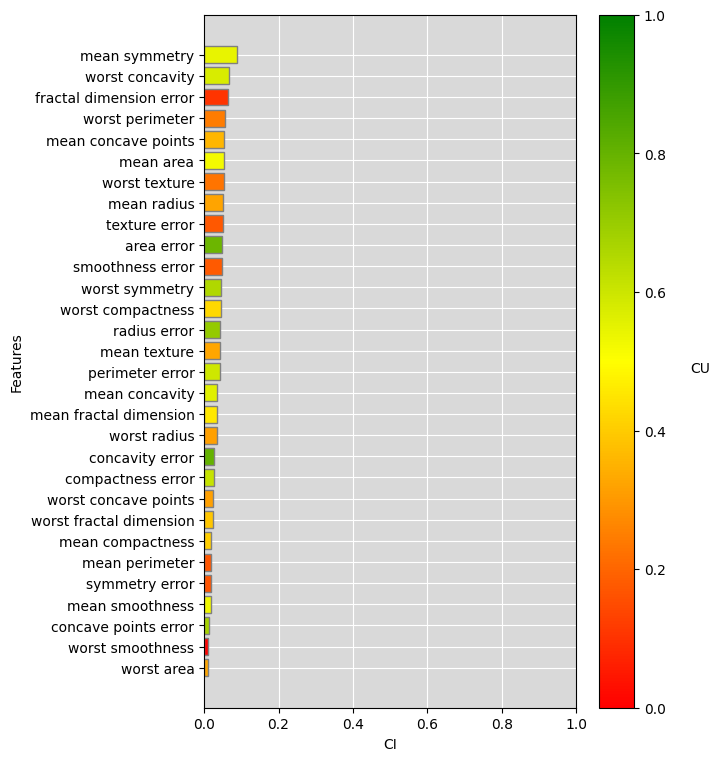

In [65]:
p = CIU_model.plot_ciu(res, figsize=(6,9))

# DEXIRE-EVO

In [66]:
from dexire_evo.ga_engine import GAEngine
from dexire_evo.rule_formatter import format_if_elif_else
from sklearn.metrics import accuracy_score, classification_report
from src.config import Config
from explainer.dexire_evo import get_dexire_evo_rules

In [67]:
best, test_acc, uncov_te, engine = get_dexire_evo_rules(feature_names, model, data)


c:\Users\robin\OneDrive\Bureau\projetsemstre\xai-on-the-wall\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitTri' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\robin\OneDrive\Bureau\projetsemstre\xai-on-the-wall\.venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


GEN 001: fid=1.000, preds=3.0, uncov=302.0
GEN 010: fid=1.000, preds=2.0, uncov=286.0
GEN 020: fid=1.000, preds=3.0, uncov=206.0
GEN 030: fid=1.000, preds=3.0, uncov=206.0
GEN 040: fid=1.000, preds=3.0, uncov=206.0
GEN 050: fid=1.000, preds=3.0, uncov=206.0
GEN 060: fid=1.000, preds=3.0, uncov=203.0
GEN 070: fid=1.000, preds=3.0, uncov=203.0
GEN 080: fid=1.000, preds=3.0, uncov=203.0
GEN 090: fid=1.000, preds=2.0, uncov=185.0
GEN 100: fid=1.000, preds=2.0, uncov=138.0
GEN 110: fid=1.000, preds=4.0, uncov=137.0
GEN 120: fid=1.000, preds=7.0, uncov=42.0
GEN 130: fid=1.000, preds=7.0, uncov=42.0
GEN 140: fid=1.000, preds=7.0, uncov=42.0
GEN 150: fid=1.000, preds=7.0, uncov=42.0
GEN 160: fid=1.000, preds=7.0, uncov=42.0
GEN 170: fid=1.000, preds=10.0, uncov=40.0
GEN 180: fid=1.000, preds=10.0, uncov=40.0
GEN 190: fid=1.000, preds=10.0, uncov=40.0
GEN 200: fid=1.000, preds=10.0, uncov=40.0


In [68]:
print("\nRules in IF–ELIF–ELSE form (GA):")
print(format_if_elif_else(best, feature_names, engine.operator_set))


Rules in IF–ELIF–ELSE form (GA):
if mean concavity < 0.11 AND worst smoothness <= 2.14 AND radius error < 0.01: class = 1
elif worst radius >= 0.31 AND mean area >= -0.40 AND mean symmetry >= -1.99: class = 0
elif worst smoothness > 2.29 AND symmetry error < 3.87 AND smoothness error <= 2.98: class = 0
else worst concave points <= -0.35: class = 1


In [69]:
print("\n=== FINAL GA RESULTS ===")
print(f"Fidelity (train vs model): {best.fitness.values[0]:.3f}")
print(f"# Predicates             : {best.fitness.values[1]}")
print(f"Uncovered (train)        : {best.fitness.values[2]}")
print(f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}")


=== FINAL GA RESULTS ===
Fidelity (train vs model): 1.000
# Predicates             : 10.0
Uncovered (train)        : 40.0
Test accuracy (matched)  : 0.960 | Uncov test: 13


In [70]:
import torch.nn as nn
import pandas as pd

def build_mlp_from_layer_df(input_size: int, df) -> nn.Module:
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df, columns=["units", "activation"])

    act_map = {
        "relu": nn.ReLU,
        "tanh": nn.Tanh,
        "leaky_relu": nn.LeakyReLU,
        "elu": nn.ELU,
    }

    layers = []
    prev = input_size

    for _, row in df.iterrows():
        try:
            units = int(row["units"])
        except (ValueError, TypeError):
            continue
        if units <= 0:
            continue

        act_name = str(row["activation"]).strip().lower() or "relu"
        if act_name not in act_map:
            act_name = "relu"

        layers.append(nn.Linear(prev, units))
        layers.append(act_map[act_name]())
        prev = units

    if not layers:
        layers = [
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
        ]
        prev = 8

    layers.append(nn.Linear(prev, 1))
    layers.append(nn.Sigmoid())

    return nn.Sequential(*layers)

In [71]:
def run_explanations_for_specific_instance(test_index):
    CIU_model = get_explainer_CIU(model, data,output_names=["malignant", "benign"], feature_names=feature_names)
    X_test_df = pd.DataFrame(data["X_test"],  columns=feature_names)
    res = get_ciu_instance(CIU_model, X_test_df.iloc[[test_index]])
    ciu_plot_out = CIU_model.plot_ciu(res, figsize=(9,6))

    return ciu_plot_out

In [ ]:
def run_explanations( dataset_mode, dataset_file, model_mode, layer_config, model_state_file, save_trained_model, learning_rate, epochs, test_index):
    print(layer_config)
    model_architecture = None
    if dataset_mode == "Demo breast cancer":
        X, y = load_breast_cancer(return_X_y=True)
        breast = load_breast_cancer()
        feature_names = breast.feature_names
    else:
        
        X, y = load_data(dataset,target_name)
        feature_names = X.columns.tolist()
    if model_mode == "Load existing model":
        model,data = train(X=X, y=y,model_state=model_state_file,model=model_architecture)
    else:
        model,data = train(X=X, y=y,model=model_architecture,save=save_trained_model,lr=learning_rate, epochs=epochs)
    model.eval()
    dexire_out = get_dexire_rules(model,data,feature_names=feature_names)
    best, test_acc, uncov_te, engine = get_dexire_evo_rules(feature_names, model, data)
    result_str += "Rules in IF–ELIF–ELSE form (GA):\n"
    result_str += "========================\n"
    result_str += format_if_elif_else(best, feature_names, engine.operator_set) + "\n"
    result_str += "========================\n"
    result_str += f"Fidelity (train vs model): {best.fitness.values[0]:.3f}\n"
    result_str += f"# Predicates             : {best.fitness.values[1]}\n"
    result_str += f"Uncovered (train)        : {best.fitness.values[2]}\n"
    result_str += f"Test accuracy (matched)  : {test_acc:.3f} | Uncov test: {uncov_te}\n"
    dexire_evo_out = result_str
    return dexire_out, dexire_evo_out

# Visibility toggle helpers

In [73]:
def toggle_dataset_file(dataset_mode):
    return gr.update(visible=(dataset_mode == "Upload CSV"))


def toggle_model_widgets(model_mode):
    load_mode = (model_mode == "Load existing model")
    return (
        gr.update(visible=load_mode),       # model_state_file
        gr.update(visible=not load_mode),   # train_cfg_group
        gr.update(visible=not load_mode),   # save_trained_model
        gr.update(visible=not load_mode),   # learning_rate
        gr.update(visible=not load_mode),   # epochs
    )

# Gradio Interface

In [74]:
with gr.Blocks(title="XAI on the Wall") as main:
    gr.Markdown("## XAI on the Wall – CIU, DexiRE & DexiRE-Evo")

    with gr.Row():
        with gr.Column(scale=1):
            # ── Dataset section ──
            gr.Markdown("### Dataset")

            dataset_mode = gr.Radio(
                ["Demo breast cancer", "Upload CSV"],
                value="Demo breast cancer",
                label="Dataset source",
            )

            dataset_file = gr.File(
                label="Upload dataset (CSV, last column = target)",
                file_types=[".csv"],
                interactive=True,
                visible=False,
            )

            # ── Model section ──
            gr.Markdown("### Model")

            model_mode = gr.Radio(
                ["Train new model", "Load existing model"],
                value="Train new model",
                label="Model source",
            )

            model_state_file = gr.File(
                label="Model state (.pth) (used if 'Load existing model')",
                file_types=[".pth", ".pt"],
                interactive=True,
                visible=False,  
            )

            with gr.Group(visible=False) as train_cfg_group:
                save_trained_model = gr.Checkbox(
                    value=False,
                    label="Save trained model to disk",
                )
                learning_rate = gr.Number(
                    value=0.001,
                    precision=3,
                    label="Learning rate",
                )
                epochs = gr.Number(
                    value=50,
                    precision=0,
                    label="Epochs",
                )

                layer_config = gr.Dataframe(
                    headers=["units", "activation"],
                    datatype=["number", "str"],
                    row_count=(2, "dynamic"), 
                    value=[
                        [16, "relu"],
                        [8, "relu"],
                    ],
                    label="Layers (add/remove rows):",
                )

                   

            run_btn = gr.Button("Train / Load")
            
            test_index = gr.Number(
                value=0,
                precision=0,
                label="Index of test instance to explain (0-based)",
            )
            run_instance_btn = gr.Button("Explain instance")

        # ── Outputs section ──
        with gr.Column(scale=2):

            gr.Markdown("### DexiRE")
            dexire_out = gr.Textbox(
                label="DexiRE rules",
                lines=10,
            )

            gr.Markdown("### DexiRE-Evo")
            dexire_evo_out = gr.Textbox(
                label="DexiRE-Evo rules & metrics",
                lines=10,
            )
            ciu_plot_out = gr.Plot(label="CIU plot")


    # ── Hook up visibility toggles ──

    dataset_mode.change(
        fn=toggle_dataset_file,
        inputs=dataset_mode,
        outputs=dataset_file,
    )

    model_mode.change(
        fn=toggle_model_widgets,
        inputs=model_mode,
        outputs=[model_state_file, train_cfg_group, save_trained_model,learning_rate,epochs],
    )

    main.load(
        fn=toggle_model_widgets,
        inputs=model_mode,
        outputs=[model_state_file, train_cfg_group, save_trained_model,learning_rate,epochs],
    )

    # ── Main run button ──
    run_btn.click(
    fn=run_explanations,
    inputs=[
        dataset_mode,
        dataset_file,
        model_mode,
        layer_config,
        model_state_file,
        save_trained_model,
        learning_rate,
        epochs,
        test_index,
    ],
    outputs=[dexire_out, dexire_evo_out],
)

    run_instance_btn.click(
        fn=run_explanations_for_specific_instance,
        inputs=[
            test_index,
        ],
        outputs=[ciu_plot_out],
    )

In [75]:
main.launch() # add share=True to have a public server 

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
